# Aula de Agrupamento (Clustering)

Este notebook Jupyter tem como objetivo apresentar e demonstrar dois algoritmos populares de agrupamento:
K-Means e K-Modes. Veremos quando usar cada um e como aplicá-los utilizando bibliotecas Python.

**Objetivos:**

1.  Entender o conceito de Agrupamento (Clustering) como tarefa de Machine Learning Não Supervisionado.
2.  Aprender o funcionamento básico do algoritmo K-Means.
3.  Aplicar K-Means em um dataset numérico usando `scikit-learn`.
4.  Aprender o funcionamento básico do algoritmo K-Modes.
5.  Aplicar K-Modes em um dataset categórico usando a biblioteca `kmodes`.
6.  Comparar K-Means e K-Modes e saber quando usar cada um.
7.  Resolver um exercício prático ao final.

**Aplicações Comuns:**

 *   Segmentação de clientes (marketing)
 *   Detecção de anomalias (segurança, fraude)
 *   Organização de documentos ou resultados de busca
 *   Análise de imagens (segmentação de pixels)
 *   Bioinformática (agrupamento de genes)


 Existem muitos algoritmos de agrupamento. Hoje, vamos focar em dois algoritmos baseados em centroides: K-Means e K-Modes.

## 1. K-Means: Agrupamento para Dados Numéricos

K-Means é um dos algoritmos de agrupamento mais populares. Ele é projetado para trabalhar com dados **numéricos contínuos**.

**Como Funciona?**

O algoritmo K-Means segue os seguintes passos:

1.  **Escolha do K:** Define-se o número de clusters (`K`) que se deseja encontrar.
2.  **Inicialização:** K centroides (pontos centrais representativos de cada cluster) são escolhidos aleatoriamente (ou usando uma heurística como K-Means++).
3.  **Atribuição:** Cada ponto de dado é atribuído ao centroide mais próximo, geralmente usando a distância Euclidiana. Isso forma K clusters iniciais.
4.  **Atualização:** Os centroides são recalculados como a média (mean) de todos os pontos de dado atribuídos a cada cluster.
5.  **Iteração:** Os passos 3 e 4 são repetidos até que os centroides não se movam significativamente ou um número máximo de iterações seja atingido.

A ideia é minimizar a **inércia** (ou *within-cluster sum of squares* - WCSS), que é a soma das distâncias quadradas de cada ponto para o centroide do seu cluster atribuído.

 **Quando Usar K-Means?**

 *   Seus dados são **numéricos**.
 *   Você tem uma ideia prévia (ou pode estimar) o número de clusters (`K`).
 *   Os clusters são esperados para serem mais ou menos **esféricos** e de tamanho similar.

**Limitações do K-Means:**

 *   É sensível à inicialização dos centroides (embora K-Means++ ajude).
 *   Requer que você especifique o número de clusters (`K`) antecipadamente.
 *   Assume clusters esféricos, o que pode levar a resultados ruins com clusters de formas irregulares ou densidades diferentes.
 *   Sensível a outliers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
X_clientes_num = df_clientes_num[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(8, 6))
plt.scatter(X_clientes_num['Annual Income (k$)'], X_clientes_num['Spending Score (1-100)'], s=50, alpha=0.8)
plt.title('Distribuição dos Clientes (Renda vs. Gasto)')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.show()

In [ ]:
# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
# Clusters identificados pelo KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster',
                data=df_clientes_num, palette='viridis', s=50, alpha=0.8, legend='full')

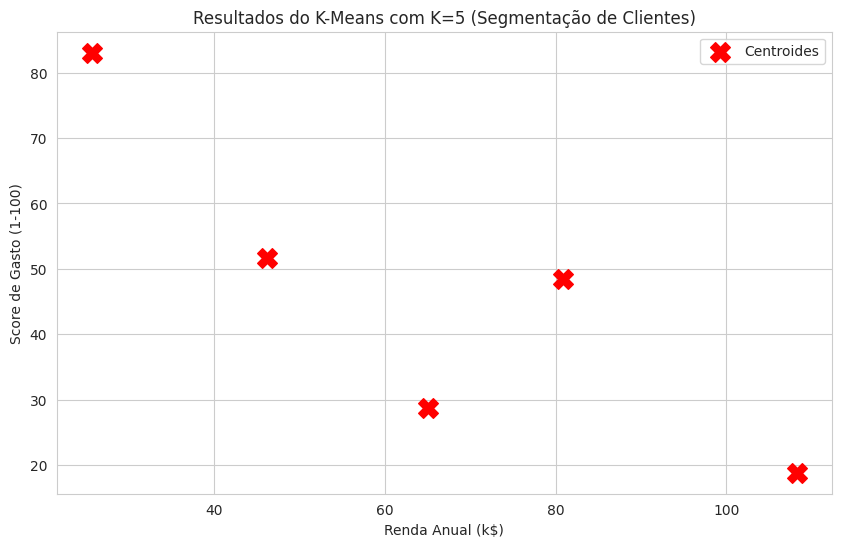

In [ ]:
# Centroides
plt.scatter(centroids_clientes[:, 0], centroids_clientes[:, 1], s=200, c='red', marker='X', label='Centroides')

plt.title(f'Resultados do K-Means com K={k} (Segmentação de Clientes)')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.legend()
plt.show()

 Agora que temos os clusters, o objetivo principal é interpretá-los. Os centroides nos dão uma boa ideia das características médias de cada grupo:

* **Exercício**: tente interpretar os clusters textualmente a seguir:

 *   **Cluster 0 (ex: roxo):** Baixa Renda, Alto Gasto. (Clientes "gastadores conscientes do orçamento" ou "novos clientes com alto engajamento inicial"?)

 *   **Cluster 1 (ex: azul claro):** interpretar

 *   **Cluster 2 (ex: amarelo):** interpretar

 *   **Cluster 3 (ex: verde):** interpretar

 *   **Cluster 4 (ex: azul escuro):** interpretar


 *Nota:* Os rótulos numéricos (0, 1, 2, 3, 4) são arbitrários e podem mudar em cada execução. O importante é a *descrição* do cluster com base nas características de seus pontos ou de seu centroide.

 Essa segmentação pode ser usada para ações de marketing direcionadas (ex: oferecer promoções para clientes "econômicos", programas de fidelidade para "VIPs", etc.).

# 2. K-Modes: Agrupamento para Dados Categóricos.

K-Modes é uma extensão do K-Means, adaptada para trabalhar com dados **categóricos**.

**Como Funciona?**

O funcionamento é análogo ao K-Means, mas com adaptações cruciais para dados não numéricos:

1.  **Escolha do K:** Define-se o número de clusters (`K`).
2.  **Inicialização:** K **modos** (pontos representativos para dados categóricos, que são os valores mais frequentes) são escolhidos.
3.  **Atribuição:** Cada ponto de dado é atribuído ao modo "mais próximo", não usando distância Euclidiana, mas uma medida de **dissimilaridade** para dados categóricos. A medida de dissimilaridade mais comum conta o número de atributos (features) que não correspondem entre dois pontos (Distância de Hamming para dados binários, ou simplesmente contagem de mismatches para dados multiclasse).
4.  **Atualização:** Os modos são recalculados como o **modo** (o valor categórico mais frequente) de cada atributo dentro de cada cluster.
5.  **Iteração:** Os passos 3 e 4 são repetidos até a convergência.

A ideia é minimizar a **dissimilaridade total**, que é a soma do número de atributos não correspondentes entre cada ponto e o modo do seu cluster.

**Quando Usar K-Modes?**

*   Seus dados são **categóricos** (strings, booleanos, fatores).
*   Você não pode (ou não quer) converter suas features categóricas em numéricas (por exemplo, usando One-Hot Encoding) porque isso pode aumentar muito a dimensionalidade e não capturar a similaridade inerente de forma ideal para K-Means.
*   Você tem uma ideia prévia do número de clusters (`K`).

**Limitações do K-Modes:**

*   Também sensível à inicialização.
*   Requer que você especifique o número de clusters (`K`).
*   A interpretação dos "modos" pode ser menos intuitiva que a dos "meios" numéricos, exigindo análise das frequências.
*   Menos conhecido e suportado que o K-Means (a implementação comum não está no `scikit-learn`). Precisamos instalar a biblioteca `kmodes`.
*   Visualizar clusters categóricos diretamente é difícil, geralmente requer análise de tabelas de frequência.

In [ ]:
# Obtendo os modos dos clusters (centroides)
modes_feedback = km.cluster_centroids_

print("\nModos dos clusters encontrados:")
# Os modos são arrays numpy. Vamos convertê-los de volta para os nomes das colunas para clareza.
modes_df_feedback = pd.DataFrame(modes_feedback, columns=df_feedback_cat.columns[:-1]) # Exclui a última coluna (KModes_Cluster)
print(modes_df_feedback)


Modos dos clusters encontrados:
         Satisfacao Recomendacao Canal_Feedback
0            Neutro          Sim           Loja
1  Muito Satisfeito          Sim         Online
2      Insatisfeito          Não            App


In [ ]:
print("\nDistribuição dos clusters encontrados:")
print(df_feedback_cat['KModes_Cluster'].value_counts())

# Composição dos clusters por feature
print("\nComposição dos clusters por feature:")
for col in df_feedback_cat.columns[:-1]: # Itera sobre as features categóricas
    print(f"\nComposição do cluster por '{col}':")
    print(pd.crosstab(df_feedback_cat['KModes_Cluster'], df_feedback_cat[col]))
    print("-" * 30)


**Exercício:** tente interpretar os clusters encontrados, analisando a composição dos clusters (usando a tabela de modos e as tabelas de frequência):

*   **Cluster 0:** O modo sugere ('Neutro', 'Sim', 'Loja'). A tabela de frequência confirma predominância de Satisfação Neutra, Recomendação dividida, e Canal_Feedback 'Loja' sendo o mais comum, seguido por 'Telefone'. Poderíamos chamar de "Clientes Neutros/Offline".

*   **Cluster 1**: interpretar.

*   **Cluster 2**: interpretar.

*Nota:* Como no K-Means, os rótulos numéricos dos clusters são arbitrários. A interpretação baseada nos modos (valores mais frequentes) e na composição (tabelas de frequência) é o que define o cluster.

Essa segmentação pode ajudar a entender diferentes perfis de clientes com base no feedback, permitindo abordagens específicas para melhorar a satisfação ou coletar mais informações.

**Exercício:** Muitas vezes temos dados mistos, isto é, numéricos e categóricos. Existem algoritmos como **K-Prototypes** (que combina K-Means e K-Modes) ou ou ainda é possível tentar abordagens de pré-processamento para um dos algoritmos (ex: OHE para categóricas e usar K-Means, mas cuidado com a alta dimensionalidade; ou discretização de numéricas para usar K-Modes). Em geral, para dados mistos, K-Prototypes é a solução mais direta. Pesquise mais sobre ele e tente aplicá-lo no primeiro dataset desta aula que possui dados mistos.